# Data Preprocessing and Binary Classification

In this project, I focus on predicting the survival of Titanic passengers. The task involves data preprocessing and building a binary classification model to predict the target variable.

### Data source
The dataset I used is based on the Titanic survival prediction problem. I have training data in a file called data.csv and evaluation data in evaluation.csv.

### List of features
- survived: Whether the passenger survived (0 = No, 1 = Yes) — this is the target variable that I aim to predict.
- pclass: Class of the ticket (1 = First, 2 = Second, 3 = Third).
- name: Name of the passenger.
- sex: Gender of the passenger.
- age: Age of the passenger in years.
- sibsp: Number of siblings/spouses aboard.
- parch: Number of parents/children aboard.
- ticket: Ticket number.
- fare: Fare of the ticket.
- cabin: Cabin number.
- embarked: Embarkation point (C = Cherbourg, Q = Queenstown, S = Southampton).
- home.dest: Home or destination.

### Project steps
In this project, I performed the following steps to build and evaluate a binary classification model:

#### 1. Data loading and splitting:

I loaded the data from the data.csv file and split it into subsets for training, validation, and testing. This helped in evaluating and comparing different models effectively.

#### 2. Data preprocessing:

I performed the following preprocessing tasks on the data:

- Feature transformation: I converted non-numeric features like sex, embarked, and name into numerical representations suitable for modeling.
- Feature engineering: I created additional features like the length of the name and removed irrelevant ones.
- Missing values: I handled missing values using appropriate strategies such as mean imputation or dropping rows with missing values.
- Visualizations: I used data visualizations to better understand the relationships between features and their impact on the target variable.

#### 3. Model building and evaluation:

I applied different machine learning models to the preprocessed data:
- Decision Tree Classifier: I evaluated the decision tree model for its suitability in handling categorical features and non-linear relationships.
- K-Nearest Neighbors (KNN): I tested the KNN model to assess its performance in classification tasks with distance-based decisions.

For each model, I:
- Analyzed the suitability of the model for the task.
Tuned hyperparameters to find the best values.
- Evaluated the model's performance by calculating F1 score, plotting the ROC curve, and determining the AUC.

#### 4. Final model selection:
After testing the models, I selected the best-performing one and assessed how well it could generalize to unseen data. I estimated the model’s expected accuracy on new data that I hadn’t used for training or validation.

#### 5. Model predictions:
I used the final model to make predictions on the evaluation data from evaluation.csv. The resulting predictions, along with the passenger IDs, were saved in a file called results.csv.

### I. Data loading and preprocessing
First, it's necessary to import the required packages and load the files that will be worked with.

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

passengers = pd.read_csv('data.csv')
evalpsngrs = pd.read_csv('evaluation.csv')

For greater accuracy in the following steps, it's essential to carefully examine the data on which the models will be built. It's useful to print the number of rows and columns (shape), basic information about the dataset (info), and the first 5 rows (head) for clarity on the data types and their contents. Afterward, it's possible to check how many missing values are in the dataset, and similar checks can be done.

In [2]:
print(passengers.shape)
print(evalpsngrs.shape)

(1000, 13)
(309, 12)


In [3]:
passengers.info()
passengers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   survived   1000 non-null   int64  
 2   pclass     1000 non-null   int64  
 3   name       1000 non-null   object 
 4   sex        1000 non-null   object 
 5   age        802 non-null    float64
 6   sibsp      1000 non-null   int64  
 7   parch      1000 non-null   int64  
 8   ticket     1000 non-null   object 
 9   fare       999 non-null    float64
 10  cabin      233 non-null    object 
 11  embarked   998 non-null    object 
 12  home.dest  566 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 101.7+ KB


,ID,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,0,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S,"Wiltshire, England Niagara Falls, NY"
1,1,0,3,"Jardin, Mr. Jose Neto",male,NaN,0,0,SOTON/O.Q. 3101305,7.0500,NaN,S,NaN
2,2,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S,NaN
3,3,1,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,370365,15.5000,NaN,Q,NaN
4,4,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,"Greensburg, PA"


In [4]:
evalpsngrs.info()
evalpsngrs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         309 non-null    int64  
 1   pclass     309 non-null    int64  
 2   name       309 non-null    object 
 3   sex        309 non-null    object 
 4   age        244 non-null    float64
 5   sibsp      309 non-null    int64  
 6   parch      309 non-null    int64  
 7   ticket     309 non-null    object 
 8   fare       309 non-null    float64
 9   cabin      62 non-null     object 
 10  embarked   309 non-null    object 
 11  home.dest  179 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 29.1+ KB


,ID,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1000,3,"Stankovic, Mr. Ivan",male,33.0,0,0,349239,8.6625,NaN,C,NaN
1,1001,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S,"New York, NY"
2,1002,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,NaN,1,0,PC 17611,133.6500,NaN,S,"New York, NY"
3,1003,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S,NaN
4,1004,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C,NaN


The evaluation.csv file is missing the "survived" column — the feature to be predicted.

In [5]:
passengers.isnull().sum()

ID             0
survived       0
pclass         0
name           0
sex            0
age          198
sibsp          0
parch          0
ticket         0
fare           1
cabin        767
embarked       2
home.dest    434
dtype: int64

In [6]:
evalpsngrs.isnull().sum()

ID             0
pclass         0
name           0
sex            0
age           65
sibsp          0
parch          0
ticket         0
fare           0
cabin        247
embarked       0
home.dest    130
dtype: int64

From the previous outputs, we can see to which data types certain features most likely belong:

Categorical features: embarked
Binary features: survived, sex
Ordinal features: pclass
Numerical features: sibsp, parch
Continuous features: ID, age, fare
Alphanumeric features: name, ticket, cabin
This information will help in the next steps of data preparation.

I will now display the summary statistics for the dataset:

In [7]:
passengers.describe()

,ID,survived,pclass,age,sibsp,parch,fare
count,1000.000000,1000.00000,1000.000000,802.000000,1000.000000,1000.00000,999.000000
mean,499.500000,0.39800,2.288000,29.850686,0.496000,0.40200,34.264352
std,288.819436,0.48973,0.840096,14.328743,1.024223,0.91719,53.315077
min,0.000000,0.00000,1.000000,0.166700,0.000000,0.00000,0.000000
25%,249.750000,0.00000,1.750000,21.000000,0.000000,0.00000,7.925000
50%,499.500000,0.00000,3.000000,28.000000,0.000000,0.00000,14.458300
75%,749.250000,1.00000,3.000000,39.000000,1.000000,0.00000,31.275000
max,999.000000,1.00000,3.000000,80.000000,8.000000,9.00000,512.329200


Since the "survived" feature is categorical and contains discrete data, the average indicates the percentage of survivors out of the total number of passengers, which is 39.8%. The majority of passengers were in third class, which is quite clear. The age of passengers was mostly around 30 years. A significant deviation can be seen in the "fare" column, even compared to the age, indicating that ticket prices varied significantly.

In [8]:
passengers.describe(include='O')

,name,sex,ticket,cabin,embarked,home.dest
count,1000,1000,1000,233,998,566
unique,999,2,746,157,3,313
top,"Kelly, Mr. James",male,CA. 2343,B57 B59 B63 B66,S,"New York, NY"
freq,2,628,9,5,698,46


Looking at these features, some interesting conclusions can be drawn. Regarding gender distribution, there were more men on board. There were also only 3 embarkation points (with most passengers boarding in Southampton), and the "ticket", "cabin", and "home.dest" columns contain quite a few duplicate values. Now, I will check the percentage of missing values for each column.

In [9]:
passengers.isnull().sum() / len(passengers) * 100

ID            0.0
survived      0.0
pclass        0.0
name          0.0
sex           0.0
age          19.8
sibsp         0.0
parch         0.0
ticket        0.0
fare          0.1
cabin        76.7
embarked      0.2
home.dest    43.4
dtype: float64

Generally, the most important columns have no missing values. The "age" column has only 19.8% missing, which can be filled using several methods (I will fill it with the average age for the dataset). "Fare" and "embarked" can also be filled. Features with too many missing values can be removed — in this case, these are "cabin" and "home.dest".

To confirm that I have the correct features for predicting the target variable "survived", I will plot a few graphs. Now, I want to explore if there is any relationship between the factors of gender, embarkation point, class, and the number of relatives on board and whether it affects survival.

In [10]:
passengers['familycount'] = passengers['sibsp'] + passengers['parch'] + 1

evalpsngrs['familycount'] = evalpsngrs['sibsp'] + evalpsngrs['parch'] + 1

In [11]:
print(passengers['familycount'].head())

0    8
1    1
2    6
3    2
4    1
Name: familycount, dtype: int64


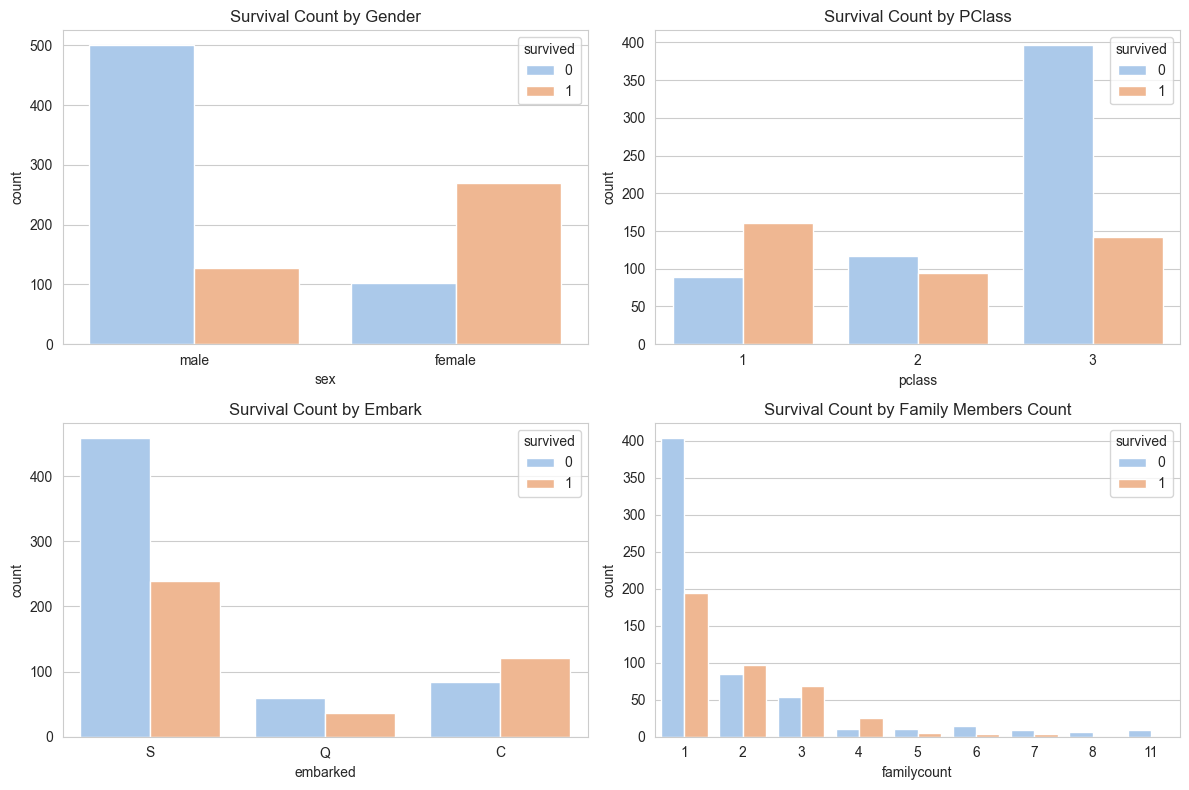

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

ax1 = sns.countplot(x='sex', hue='survived', data=passengers, palette='pastel', ax=axes[0, 0])
ax1.set_title("Survival Count by Gender")

ax2 = sns.countplot(x='pclass', hue='survived', data=passengers, palette='pastel', ax=axes[0, 1])
ax2.set_title("Survival Count by PClass")

ax3 = sns.countplot(x='embarked', hue='survived', data=passengers, palette='pastel', ax=axes[1, 0])
ax3.set_title("Survival Count by Embark")

ax4 = sns.countplot(x='familycount', hue='survived', data=passengers, palette='pastel', ax=axes[1, 1])
ax4.set_title("Survival Count by Family Members Count")

plt.tight_layout()

plt.show()

It is clear that, despite there being significantly more men on board, the number of surviving women is almost 2.5 times higher than the number of surviving men. It is also noticeable that the embarkation class influenced survival — most of the survivors were from 1st class. The other two factors are not as obvious, although it can be seen that those who boarded in Cherbourg mostly survived.

Therefore, gender and class are important factors for survival. The other two features play a role to varying degrees.

Now that I know the necessary and unnecessary features for training the models, I can finally start modifying the data.

To avoid any errors in future predictions, I will make the same changes in the evaluation.csv file while editing the data.csv file. That is, if I remove a feature or fill in missing values, the same changes will be made in both files.

In [13]:
# I will start by filling in the missing values
mode_embarked = passengers['embarked'].mode()[0]
passengers['embarked'].fillna(mode_embarked, inplace=True)

mode_fare = passengers['fare'].mode()[0]
passengers['fare'].fillna(mode_fare, inplace=True)

mean_age = passengers['age'].mean()
passengers['age'].fillna(mean_age, inplace=True)

# Of these 3 features in the evaluation.csv file, only "age" has missing values
mean_age_ev = evalpsngrs['age'].mean()
evalpsngrs['age'].fillna(mean_age_ev, inplace=True)

# I will remove features that do not influence the survival outcome: ID, ticket, cabin, home.dest
passengers = passengers.drop(['ID', 'ticket', 'cabin', 'home.dest', 'parch', 'sibsp', 'fare'], axis=1)

# and now also in the evaluation.csv file
evalpsngrs = evalpsngrs.drop(['ID', 'ticket', 'cabin', 'home.dest', 'parch', 'sibsp', 'fare'], axis=1)

# I will create a new feature that measures the length of the name and remove the "name" feature
def process_name_column(data):
    data['title'] = data['name'].str.extract(' ([A-Za-z]+)\.')
    data['title'] = data['title'].apply(lambda x: 'Mr' if x in ['Master', 'Mr'] else x)
    title_counts = data['title'].value_counts()
    rare_titles = (title_counts < 10)
    data['title'] = data['title'].apply(lambda x: 'Rare' if rare_titles[x] else x)
    data = data.drop(['name'], axis=1)
    return data
passengers = process_name_column(passengers)
evalpsngrs = process_name_column(evalpsngrs)

# Convert the "title" feature to category type
passengers['title'] = passengers['title'].astype('category')
passengers['title'] = passengers['title'].cat.codes
evalpsngrs['title'] = evalpsngrs['title'].astype('category')
evalpsngrs['title'] = evalpsngrs['title'].cat.codes

# Convert the values of the "sex" column to binary form: 0 - male, 1 - female
passengers['sex'] = passengers['sex'].astype('category')
passengers['sex'] = passengers['sex'].cat.codes
evalpsngrs['sex'] = evalpsngrs['sex'].astype('category')
evalpsngrs['sex'] = evalpsngrs['sex'].cat.codes

# Convert the "embarked" feature type to category
passengers['embarked'] = passengers['embarked'].astype('category')
passengers['embarked'] = passengers['embarked'].cat.codes
evalpsngrs['embarked'] = evalpsngrs['embarked'].astype('category')
evalpsngrs['embarked'] = evalpsngrs['embarked'].cat.codes

/var/folders/zj/l17lzcjj3wg5tjllnkvdczh40000gn/T/ipykernel_20264/2213038832.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  passengers['embarked'].fillna(mode_embarked, inplace=True)
/var/folders/zj/l17lzcjj3wg5tjllnkvdczh40000gn/T/ipykernel_20264/2213038832.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [14]:
passengers.info()
passengers.head()
passengers.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     1000 non-null   int64  
 1   pclass       1000 non-null   int64  
 2   sex          1000 non-null   int8   
 3   age          1000 non-null   float64
 4   embarked     1000 non-null   int8   
 5   familycount  1000 non-null   int64  
 6   title        1000 non-null   int8   
dtypes: float64(1), int64(3), int8(3)
memory usage: 34.3 KB


survived       0
pclass         0
sex            0
age            0
embarked       0
familycount    0
title          0
dtype: int64

In [15]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     1000 non-null   int64  
 1   pclass       1000 non-null   int64  
 2   sex          1000 non-null   int8   
 3   age          1000 non-null   float64
 4   embarked     1000 non-null   int8   
 5   familycount  1000 non-null   int64  
 6   title        1000 non-null   int8   
dtypes: float64(1), int64(3), int8(3)
memory usage: 34.3 KB


In [16]:
evalpsngrs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       309 non-null    int64  
 1   sex          309 non-null    int8   
 2   age          309 non-null    float64
 3   embarked     309 non-null    int8   
 4   familycount  309 non-null    int64  
 5   title        309 non-null    int8   
dtypes: float64(1), int64(2), int8(3)
memory usage: 8.3 KB


It is quite clear that the dataset no longer contains any missing values, all data are in a format suitable for machine learning, and are therefore ready for the next step.

### II. Preparing data for model training

Since the task involves applying a decision tree and k-nearest neighbors method, it is appropriate to split the data.csv file into training, testing, and validation sets for both models.

In [17]:
Xdata = passengers.drop('survived', axis = 1)
ydata = passengers.survived

In [18]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size=0.4, random_state=111) 

display(Xtrain.shape)
display(ytrain.shape)
display(Xtest.shape)
display(ytest.shape)

(600, 6)

(600,)

(400, 6)

(400,)

In [19]:
Xval, Xtest, yval, ytest = train_test_split(Xtest, ytest, test_size=0.5, random_state=111) 

display(Xval.shape)
display(yval.shape)
display(Xtest.shape)
display(ytest.shape)

(200, 6)

(200,)

(200, 6)

(200,)

The data is divided in a 60/20/20 ratio, with the training set being the largest (60%), and the testing and validation sets are of equal size. This way, machine learning models can be applied, and the best one can be sought.

### III. Training models

#### Decision tree

A decision tree is a good model for a classification problem when the data has clear, easily interpretable features and relationships because it can provide a simple and transparent way of making predictions. However, with complex datasets that have many intertwined features, decision trees may struggle to capture complex patterns. I will start with the smallest possible depth of 1, and then find the better parameters.

In [20]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 1)
clf.fit(Xtrain, ytrain)

DecisionTreeClassifier(max_depth=1)

In [21]:
import sklearn.metrics as metrics

print('Accuracy on validation data: {0:.4f}'.format(metrics.accuracy_score(yval, clf.predict(Xval))))

Accuracy on validation data: 0.7900


A pretty good result, but I will try training k-NN and compare them.

#### k-nearest neighbors

k-NN is a good model for a classification problem when the data exhibits localized patterns and the choice of the correct distance metric and value of K is well-suited to the problem. It is efficient in cases where instances with similar features tend to belong to the same class. However, k-NN may perform poorly when dealing with high-dimensional or noisy data, as it may suffer from the curse of dimensionality and sensitivity to outliers. I will first try the smallest possible parameter of 1.

In [22]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 1)
clf.fit(Xtrain, ytrain)

KNeighborsClassifier(n_neighbors=1)

In [23]:
print('Accuracy on validation data: {0:.4f}'.format(metrics.accuracy_score(yval, clf.predict(Xval))))

Accuracy on validation data: 0.6800


Even with the smallest parameter, it is clear that the decision tree was more accurate on the validation data. Anyway, I will perform hyperparameter tuning for both models and try to improve their accuracy.

### IV. Hyperparameter tuning

#### Decision tree

I will first focus on hyperparameter tuning for the decision tree. For this, I will use the grid search algorithm, which will help me find the best values for the hyperparameters. Then, I will calculate metrics like F1 score, AUC, and plot the ROC curve for the tree with the newly found hyperparameters.

In [24]:
from sklearn.model_selection import ParameterGrid

param_grid = {
    'max_depth': range(1,30), 
    'criterion': ['entropy', 'gini']
}
param_comb = ParameterGrid(param_grid)
[param_comb[i] for i in range(2)]

[{'max_depth': 1, 'criterion': 'entropy'},
 {'max_depth': 2, 'criterion': 'entropy'}]

In [25]:
val_acc = []
train_acc = []
for params in param_comb:
    clf = DecisionTreeClassifier(max_depth=params['max_depth'], criterion=params['criterion'])
    clf.fit(Xtrain, ytrain)
    train_acc.append(metrics.accuracy_score(ytrain, clf.predict(Xtrain)))
    val_acc.append(metrics.accuracy_score(yval, clf.predict(Xval)))

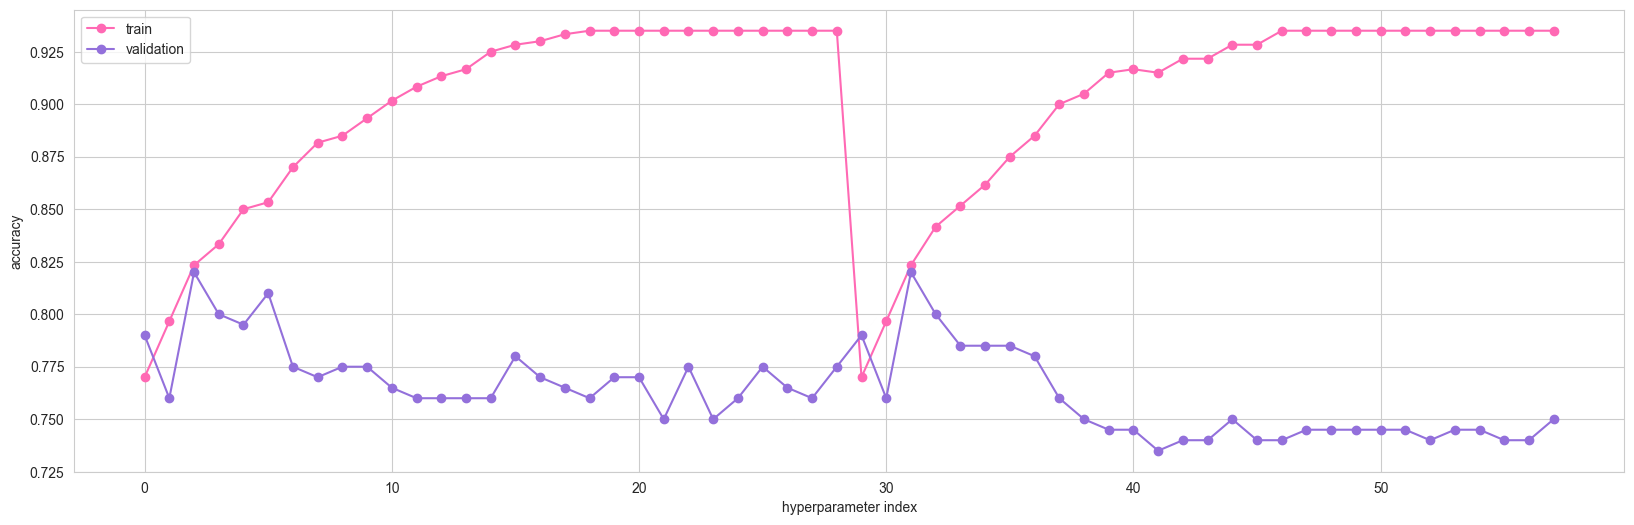

In [26]:
plt.figure(figsize=(20, 6))
plt.plot(train_acc, marker='o', color='#FF69B4', linestyle='-')
plt.plot(val_acc, marker='o', color='#9370DB', linestyle='-')
plt.xlabel('hyperparameter index')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])
plt.show()

In [27]:
bestprms = param_comb[np.argmax(val_acc)]
bestprms

{'max_depth': 3, 'criterion': 'entropy'}

In [28]:
clfdt = DecisionTreeClassifier(**bestprms)
clfdt.fit(Xtrain, ytrain)
y_pred = clfdt.predict(Xtest)
print('Accuracy on validation data: {0:.4f}'.format(metrics.accuracy_score(yval, clfdt.predict(Xval))))
print('F1 score: {0:.4f}'.format(metrics.f1_score(yval, clfdt.predict(Xval))))

Accuracy on validation data: 0.8200
F1 score: 0.7534


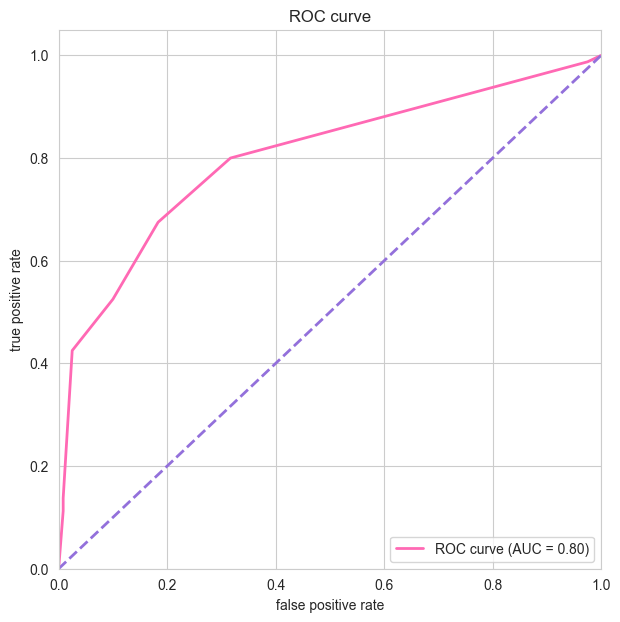

In [29]:
from sklearn.metrics import roc_auc_score, roc_curve

# Prediction probabilities for the positive class (class 1) on the test set
y_scores = clfdt.predict_proba(Xtest)[:, 1]

# Compute AUC
auc = roc_auc_score(ytest, y_scores)

# Compute ROC
fpr, tpr, thresholds = roc_curve(ytest, y_scores)

# ROC plot
plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, color='#FF69B4', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='#9370DB', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

The resulting F1 score is 0.75, and the AUC is 0.8, which is quite good. The F1 score means the model correctly classifies 75% of truly positive/negative cases while minimizing false positives and false negatives. An AUC of 80% shows that the model has a good ability to distinguish between positive and negative classes.

#### k-nearest neighbors

I will perform the same calculations as in the previous step, but for k-NN.

In [30]:
val_acc = []
train_acc = []

kneighbors = range(3, 20)
for k in kneighbors:
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(Xtrain, ytrain)
    val_acc.append(clf.score(Xval, yval))
    train_acc.append(clf.score(Xtrain, ytrain))

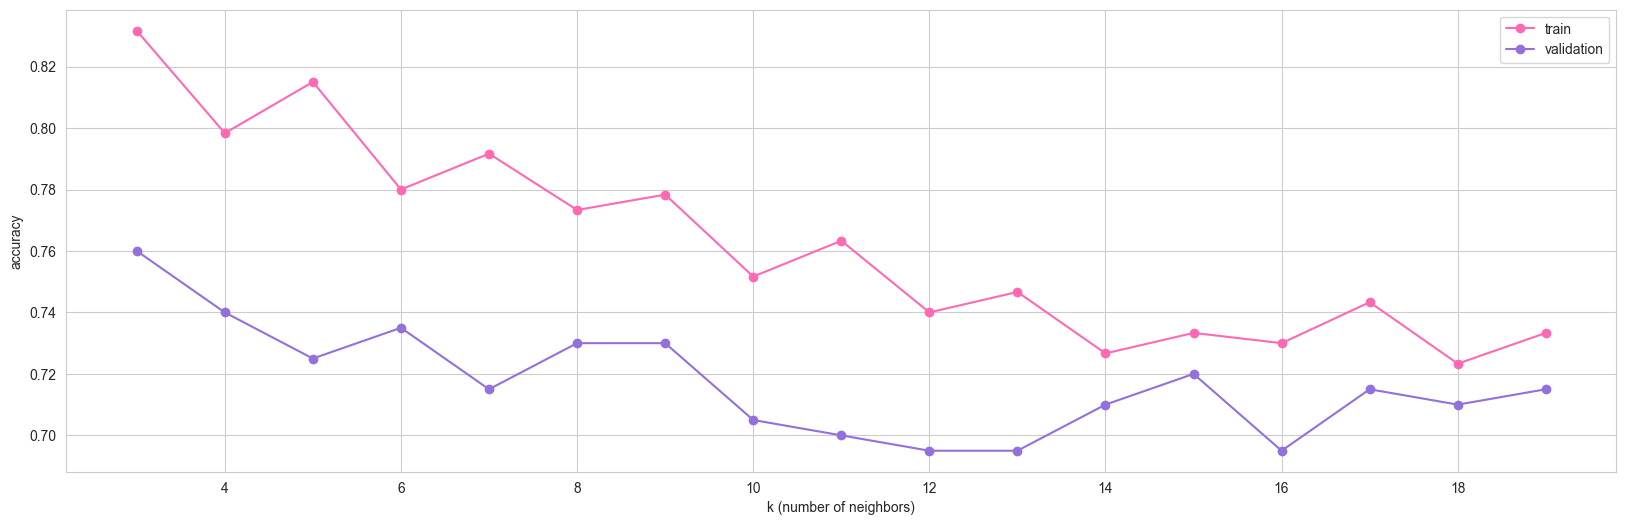

In [31]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 6))
plt.plot(kneighbors, train_acc, marker='o', color='#FF69B4', linestyle='-')
plt.plot(kneighbors, val_acc, marker='o', color='#9370DB', linestyle='-')
plt.xlabel('k (number of neighbors)')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])
plt.show()

In [32]:
optimal_k = kneighbors[val_acc.index(max(val_acc))]
print("Optimal k value:", optimal_k)

Optimal k value: 3


In [33]:
clfknn = KNeighborsClassifier(optimal_k)
clfknn.fit(Xtrain, ytrain)
print('Accuracy on validation data: {0:.4f}'.format(metrics.accuracy_score(yval, clfknn.predict(Xval))))
print('F1 score: {0:.4f}'.format(metrics.f1_score(yval, clfknn.predict(Xval))))

Accuracy on validation data: 0.7600
F1 score: 0.6842


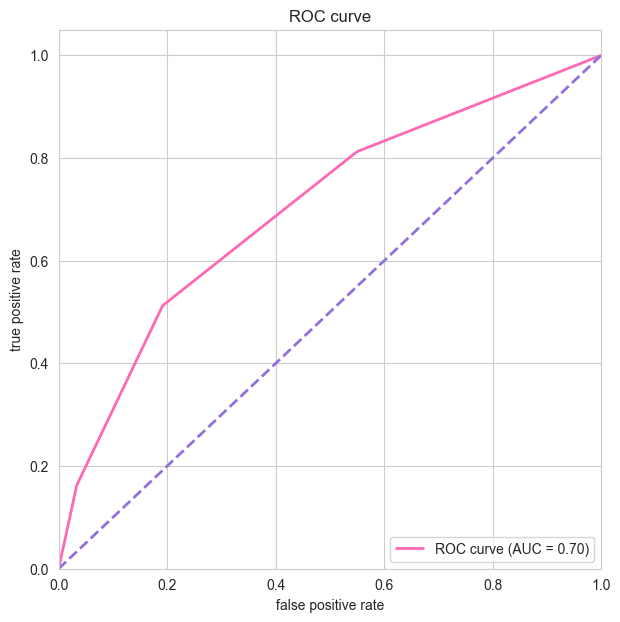

In [34]:
# Predict probabilities for the positive class (class 1) on the test set
y_scores = clfknn.predict_proba(Xtest)[:, 1]

# Calculate AUC
auc = roc_auc_score(ytest, y_scores)

# Calculate ROC
fpr, tpr, thresholds = roc_curve(ytest, y_scores)

# Plot the ROC
plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, color='#FF69B4', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='#9370DB', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

The achieved F1 score is 0.7, and AUC is 0.72 (a little lower than the results of the decision tree).

Therefore, the decision tree has better accuracy: F1 = 0.75 compared to k-NN with 0.7; AUC = 0.8 compared to 0.72 (k-NN). The final best model will therefore be the decision tree with max_depth = 3 and criterion = entropy. I will now look at the accuracy of the model on data it has not seen before:

In [35]:
clfdt = DecisionTreeClassifier(**bestprms)
clfdt.fit(Xtrain, ytrain)
y_pred = clfdt.predict(Xtest)
print('Accuracy on test data: {0:.4f}'.format(metrics.accuracy_score(ytest, clfdt.predict(Xtest))))

Accuracy on test data: 0.7500


### V. Final prediction

Now I will train the tree with the found optimal hyperparameters on the entire training set. The resulting model will be usable for predicting the "survived" feature.

In [36]:
predictions = clfdt.predict(evalpsngrs)
results_df = pd.DataFrame({'Survived': predictions})
results_df.to_csv('results.csv', index=False)

In [37]:
res = pd.read_csv('results.csv')
res.index = range(1000, 1000 + len(res))
res.to_csv('results.csv')

In [38]:
counts = results_df['Survived'].value_counts()
print('survived:', counts[1])
print('not survived:', counts[0])

survived: 76
not survived: 233


### VI. Conclusion

To complete this task, it was first necessary to analyze which features (called features) influenced the survival of Titanic passengers. An exploratory data analysis was performed (with visualizations of the final most significant properties), followed by the creation of 2 models — a decision tree and k-NN, for which the best hyperparameters were then found. The final most accurate model was selected based on metrics such as F1 score, ROC, and AUC. Finally, a prediction for the dependent variable "survived" in the evaluation.csv file was made, and the results were saved in a new file results.csv.